Title: Exploratory Data Analysis of the Titanic Dataset using Plotly Express

To perform an exploratory data analysis on the Titanic dataset using Plotly Express. You will create visualizations to gain insights into the passengers' demographics and their chances of survival.

Create a bar plot to visualize the number of passengers who survived and did not survive, broken down by gender.

In [8]:
import pandas as pd
import plotly.express as px

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Create a bar plot to visualize the number of passengers who survived and did not survive, broken down by gender.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

# Count the number of passengers by survival status and gender
survived_gender_counts = df.groupby(['Survived', 'Sex']).size().reset_index(name='Count')

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(x=survived_gender_counts['Survived'] + survived_gender_counts['Sex'],
        height=survived_gender_counts['Count'],
        tick_label=survived_gender_counts['Sex'],
        color=['red', 'green'])

# Set the plot title and labels
plt.title('Number of Passengers by Survival Status and Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Did not survive', 'Survived'])

# Show the plot
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 800x600 with 0 Axes>

Create a histogram to display the distribution of passengers' ages. Use different colors for passengers who survived and did not survive.

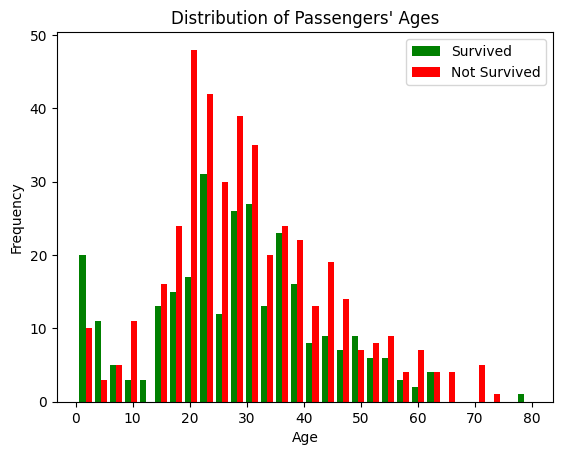

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Separate the ages of passengers who survived and did not survive
survived_ages = df[df['Survived'] == 1]['Age']
not_survived_ages = df[df['Survived'] == 0]['Age']

# Plot the histogram
plt.hist([survived_ages, not_survived_ages], bins=30, color=['green', 'red'], label=['Survived', 'Not Survived'])

# Set the plot title and labels
plt.title("Distribution of Passengers' Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Create a violin plot to visualize the distribution of fare prices paid by passengers, broken down by their class (1st, 2nd, and 3rd class).



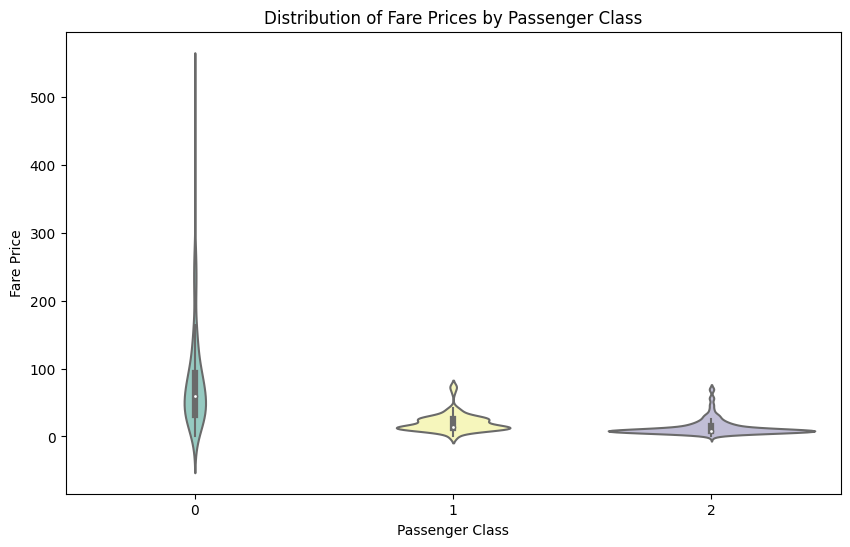

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Filter the fare prices by passenger class
fare_by_class = [df[df['Pclass'] == 1]['Fare'],
                 df[df['Pclass'] == 2]['Fare'],
                 df[df['Pclass'] == 3]['Fare']]

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=fare_by_class, palette='Set3')

# Set the plot title and labels
plt.title('Distribution of Fare Prices by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price')

# Show the plot
plt.show()


Generate a scatter plot to explore the relationship between passengers' ages and fare prices, using different colors and symbols for the different classes.

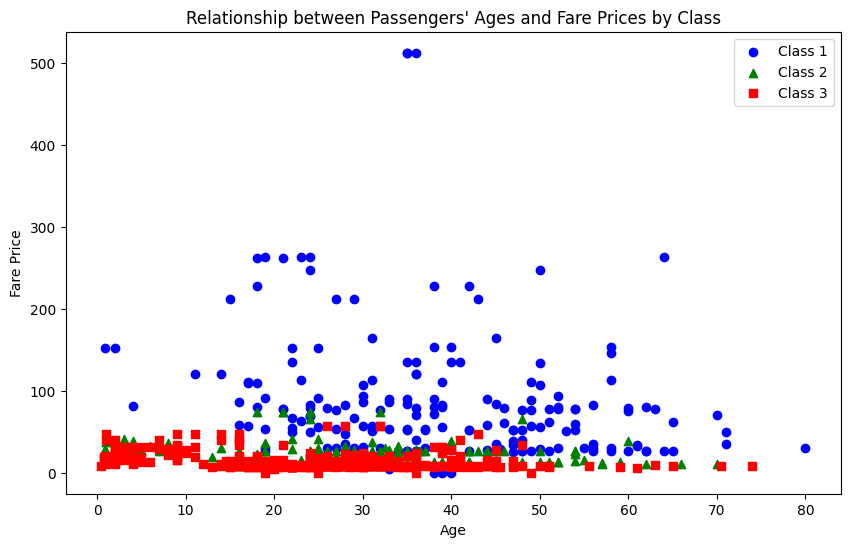

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Define colors and symbols for each passenger class
class_colors = ['blue', 'green', 'red']
class_symbols = ['o', '^', 's']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for i in range(3):
    class_data = df[df['Pclass'] == i + 1]
    plt.scatter(class_data['Age'], class_data['Fare'], color=class_colors[i], marker=class_symbols[i], label=f'Class {i + 1}')

# Set the plot title and labels
plt.title("Relationship between Passengers' Ages and Fare Prices by Class")
plt.xlabel('Age')
plt.ylabel('Fare Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Use faceting to create a scatter plot matrix displaying the relationship between age, fare, and class for passengers who survived and did not survive.

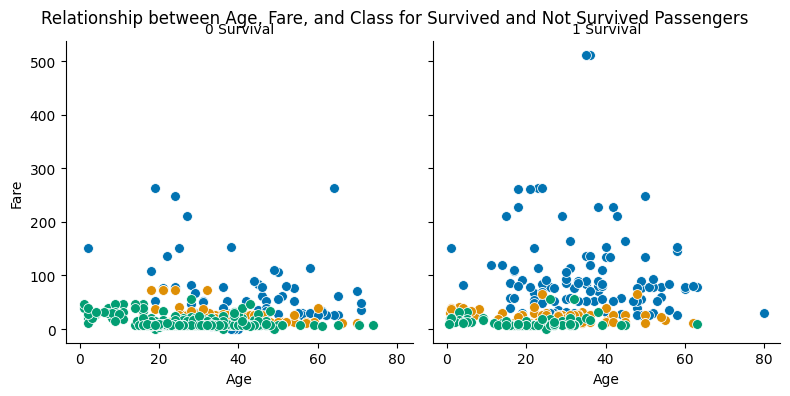

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Create the scatter plot matrix with faceting
g = sns.FacetGrid(df, col="Survived", hue="Pclass", palette="colorblind", height=4)
g.map(sns.scatterplot, "Age", "Fare", s=50)
g.set_titles(col_template="{col_name} Survival")

# Set the plot title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age, Fare, and Class for Survived and Not Survived Passengers')

# Show the plot
plt.show()


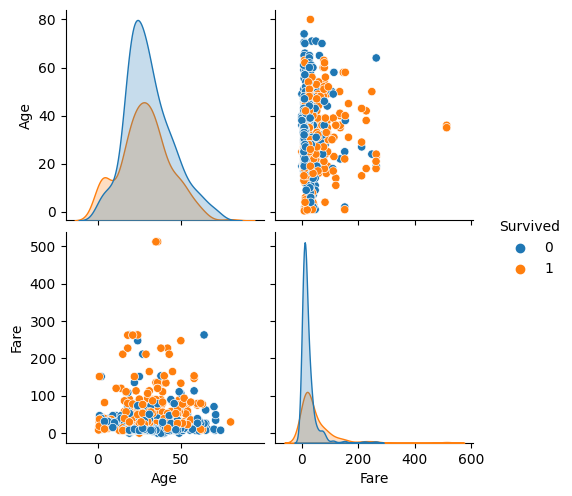

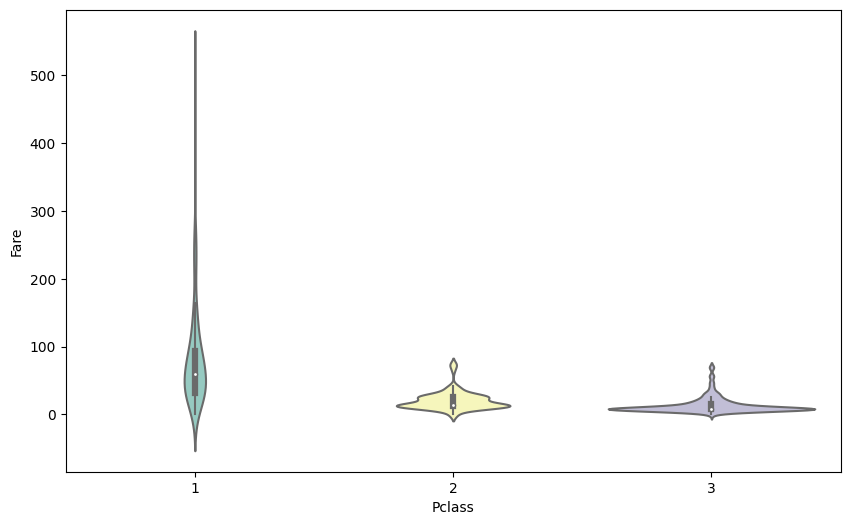

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base64

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Create the scatter plot matrix
g = sns.pairplot(df, vars=["Age", "Fare"], hue="Survived")
scatter_plot_matrix = g.fig

# Save the scatter plot matrix as HTML
scatter_plot_matrix.savefig("scatter_plot_matrix.png", format="png")
with open("scatter_plot_matrix.png", "rb") as f:
    scatter_plot_matrix_data = f.read()
scatter_plot_matrix_html = f'<img src="data:image/png;base64,{base64.b64encode(scatter_plot_matrix_data).decode()}" />'
with open("scatter_plot_matrix.html", "w") as f:
    f.write(scatter_plot_matrix_html)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Pclass", y="Fare", palette="Set3")

# Save the violin plot as HTML
violin_plot = plt.gcf()
violin_plot.savefig("violin_plot.png", format="png")
with open("violin_plot.png", "rb") as f:
    violin_plot_data = f.read()
violin_plot_html = f'<img src="data:image/png;base64,{base64.b64encode(violin_plot_data).decode()}" />'
with open("violin_plot.html", "w") as f:
    f.write(violin_plot_html)
